In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from scipy.integrate import odeint
from math import pi
from pysindy.differentiation import FiniteDifference
fd = FiniteDifference(order=2, d=1)

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import glob
from sklearn.metrics import mean_absolute_error
import timeit

from scipy.io import loadmat


In [2]:
filename = 'ac10.txt'
data = np.loadtxt(filename)

In [3]:
data

array([[17.46060934,  0.19992276],
       [17.43333998,  0.19988243],
       [17.39698083,  0.19984653],
       ...,
       [17.53332764,  0.19991569],
       [17.51514807,  0.19999145],
       [17.49696849,  0.19989596]])

In [4]:
#x = data[:,1]
#x = x*100
y = data[:,0]
#plt.plot(x,y)

In [5]:
#x.shape

In [6]:
t = np.linspace(0, 10, 1000)

In [7]:
from math import pi
x = 20*np.sin(pi*t/5 - 3*pi/2)


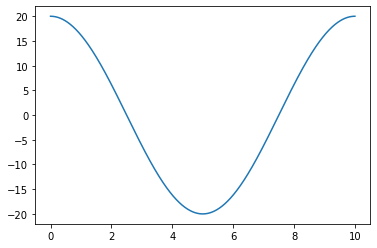

In [8]:
plt.plot(t, x)

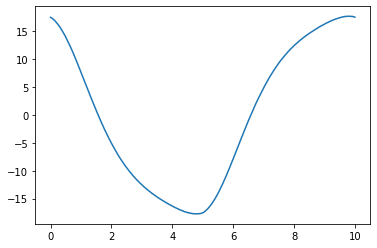

In [9]:
plt.plot(t, y)

In [10]:
y.shape

(1000,)

In [11]:
from scipy.signal import savgol_filter
yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3

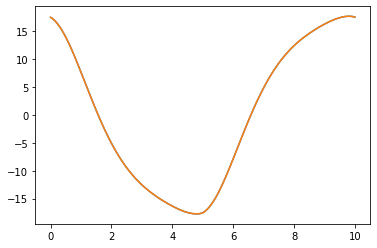

In [12]:
#plt.plot(t, y)
plt.plot(t, yhat)
plt.plot(t, y)

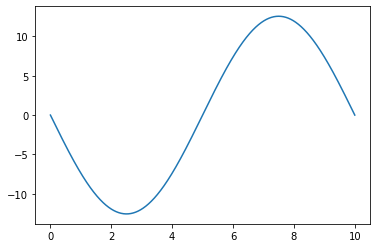

In [13]:
dx = fd._differentiate(x, t)
plt.plot(t, dx)

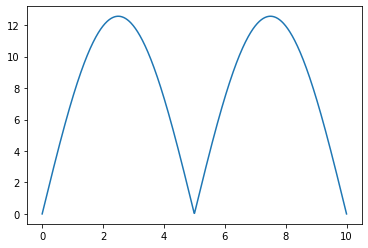

In [14]:
mdx = np.abs(dx)
plt.plot(t, mdx)

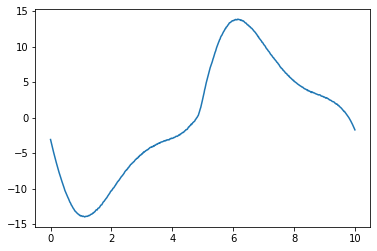

In [15]:
dy = fd._differentiate(yhat, t)
plt.plot(t, dy)

In [16]:
my = np.abs(y)
my = my.reshape(-1,)
mx = np.abs(x)
mx = mx.reshape(-1,)

In [17]:
y = y.reshape(-1,)
dy = dy.reshape(-1,)
mdy = np.abs(dy)
mdy = mdy.reshape(-1,)

In [18]:
X = np.stack((y, x, dx, mdx, my), axis=-1)

In [19]:
from pysindy.feature_library import FourierLibrary, CustomLibrary
from pysindy.feature_library import ConcatLibrary
lib_fourier = FourierLibrary(n_frequencies=2)

In [20]:
opt = ps.STLSQ(threshold=0.01)
model = ps.SINDy(optimizer=opt)
model.fit(X,t)
model.print()

(x0)' = -0.814 x0 + 0.651 x1 + 2.983 x2 + 0.063 x0 x4 + -0.026 x1 x3 + -0.058 x1 x4 + -0.132 x2 x3 + -0.061 x2 x4
(x1)' = 1.000 x2
(x2)' = -0.395 x1
(x3)' = 0.560 x0 + -0.576 x1 + -1.207 x2 + -12.225 x3 + -8.620 x4 + 1.158 x0^2 + -3.287 x0 x1 + -2.311 x0 x2 + 0.049 x0 x3 + -0.074 x0 x4 + 1.479 x1^2 + 1.684 x1 x2 + -0.050 x1 x3 + 0.071 x1 x4 + 0.676 x2^2 + 0.019 x2 x3 + 0.077 x2 x4 + 0.676 x3^2 + 0.769 x3 x4 + 1.158 x4^2
(x4)' = -0.015 1 + -0.921 x0 + 0.895 x1 + 0.859 x2 + 50.834 x3 + 29.910 x4 + -1.283 x0^2 + 3.459 x0 x1 + 0.800 x0 x2 + -0.040 x0 x3 + 0.053 x0 x4 + -2.382 x1^2 + -0.686 x1 x2 + 0.032 x1 x3 + -0.050 x1 x4 + -1.484 x2^2 + -0.050 x2 x4 + -1.484 x3^2 + -2.662 x3 x4 + -1.283 x4^2


In [21]:
t=t.reshape(-1,)
y=y.reshape(-1,)
my=my.reshape(-1,)

In [22]:
#c1 = 0.640
#c2 = -100.365
#c3 = 78.573
#c4 = -1.219
#c5 = 0.280
#c6 = -0.339
#c7 = -101.503
#c8 = 0.873
#c9 = -609.448
#c10 = 1.108
#def test_model(y, t):
 #   t1 = c1*(y)
 #   t2 = c2*(.20*np.sin(pi*t/5 - 3*pi/2))
  #  t3 = c3*(0.04*pi*np.cos(pi*t/5 - 3*pi/2))
   # t4 = c4*(np.abs(0.04*pi*np.cos(pi*t/5 - 3*pi/2)))
    #t5 = c5*(y)*(0.04*pi*np.cos(pi*t/5 - 3*pi/2))
  #  t6 = c6*(y)*(np.abs(0.04*pi*np.cos(pi*t/5 - 3*pi/2)))
   # t7 = c7*(.20*np.sin(pi*t/5 - 3*pi/2))*(np.abs(0.04*pi*np.cos(pi*t/5 - 3*pi/2)))
   # t8 = c8*(.20*np.sin(pi*t/5 - 3*pi/2))*(np.abs(y))
#    t9 = c9*(0.04*pi*np.cos(pi*t/5 - 3*pi/2))*(np.abs(0.04*pi*np.cos(pi*t/5 - 3*pi/2)))
 #   t10 = c10*(0.04*pi*np.cos(pi*t/5 - 3*pi/2))*(np.abs(y))
  #  dydt = t1 + t2 + t3 + t4 + t5 + t6 + t7 + t8 + t9 + t10
   # return dydt

In [23]:
def test_model(y, t):
    x0 = y
    x1 = 20*np.sin(pi*t/5 - 3*pi/2)
    x2 = 4*pi*np.cos(pi*t/5 - 3*pi/2)
    x3 = np.abs(x2)
    x4 = np.abs(y)
    dydt = -0.814*x0 + 0.651*x1 + 2.983*x2 + 0.063*x0*x4 - 0.026*x1*x3 - 0.058*x1*x4 - 0.132*x2*x3 - 0.061*x2*x4
    return dydt

In [24]:
#c1 = 1.175
#c2 = -1.324
#c3 = 0.697
#c4 = -0.092
#c5 = 0.066
#def test_model2(y, t):
 #   dydt = c1*y + c2*20*np.sin(pi*t/5 - 3*pi/2) + c3*4*pi*np.cos(pi*t/5 - 3*pi/2) + c4*y*np.abs(4*pi*np.cos(pi*t/5 - 3*pi/2)) + c5*(20*np.sin(pi*t/5 - 3*pi/2))*(np.abs(4*pi*np.cos(pi*t/5 - 3*pi/2)))
 #   return dydt

In [25]:
y[0]

17.46060934

In [26]:
ytest_0 = 17.46060934
y_test = odeint(test_model, ytest_0, t)

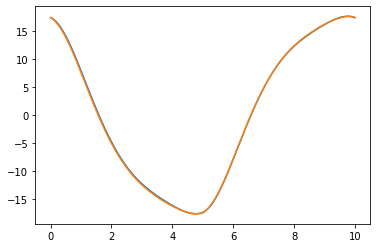

In [27]:
plt.plot(t, y_test)
plt.plot(t, y)

(array([-0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,
         0.2 ,  0.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

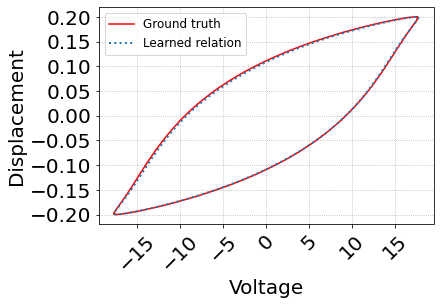

In [28]:
plt.grid(linestyle='dotted')
plt.plot(y, x/100, 'r')
plt.plot(y_test, x/100, linewidth=2, linestyle=':')
plt.xlabel('Voltage', fontsize = 20)
plt.ylabel('Displacement', fontsize = 20)
plt.legend(['Ground truth' , 'Learned relation'], loc='upper left', prop={'size': 12})
plt.xticks(fontsize=20, rotation='45')
plt.yticks(fontsize=20)
#plt.savefig("Pics/Slide14_loop.png", dpi=1000,bbox_inches='tight')

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2 = r2_score(y, y_test)

In [31]:
r2

0.9998523419969622

In [32]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test: ", relative_error_test*100, "%")

Relative Error Test:  0.014765481326163893 %


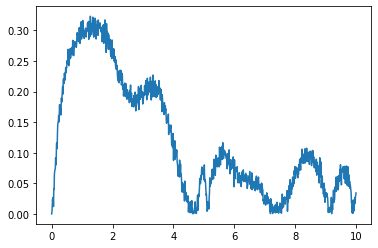

In [33]:
err_t = np.abs(y-y_test)
plt.plot(t, err_t)

In [34]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, y_test))
nrmse = rmse*2.5
nrmse

0.3859924441736154

In [35]:
filename2 = 'data_file_Loops.txt'
data = np.loadtxt(filename2, skiprows=1)

In [36]:
data

array([[19.99 , 17.24 , 17.359],
       [19.99 , 17.651, 17.354],
       [19.98 , 17.517, 17.347],
       ...,
       [19.98 , 17.625, 17.347],
       [19.99 , 17.622, 17.354],
       [19.99 , 17.564, 17.359]])

In [37]:
x_ax = data[:,0]
y_hystlab = data[:,1]

In [38]:
x_ax.shape

(988,)

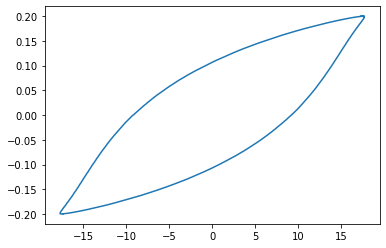

In [39]:
#plt.plot(x_ax, y_sind)
plt.plot(y_hystlab, x_ax/100)

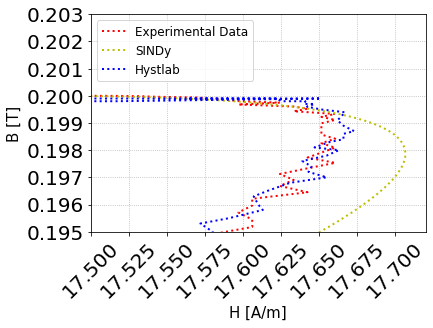

In [81]:
plt.grid(linestyle='dotted')
plt.plot(y, x/100, 'r', linewidth=2, linestyle=':')
plt.plot(y_test, x/100, 'y', linewidth=2, linestyle=':')
plt.plot(y_hystlab, x_ax/100, 'b', linewidth=2, linestyle=':')
plt.xlabel('H [A/m]', fontsize = 15)
plt.ylabel('B [T]', fontsize = 15)
plt.xlim([17.5, 17.72])
plt.ylim([0.195, 0.203])
plt.legend(['Experimental Data' ,'SINDy', 'Hystlab'], loc='upper left', prop={'size': 12})
plt.xticks(fontsize=20, rotation='45')
plt.yticks(fontsize=20)
plt.savefig("Results/pic6.png", dpi=1000,bbox_inches='tight')

In [41]:
y_limited = y[0:988,:]

In [42]:
y_hystlab = y_hystlab.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_hystlab - y_limited)**2)/np.mean(y_limited**2)
print("Relative Error Test: ", relative_error_test*100, "%")

Relative Error Test:  0.11072939882261112 %


In [43]:
y_hystlab

array([[ 17.24    ],
       [ 17.651   ],
       [ 17.517   ],
       [ 17.425   ],
       [ 17.334   ],
       [ 17.291   ],
       [ 17.239   ],
       [ 17.226   ],
       [ 17.156   ],
       [ 17.115   ],
       [ 17.052   ],
       [ 17.016   ],
       [ 16.949   ],
       [ 16.907   ],
       [ 16.854   ],
       [ 16.803   ],
       [ 16.726   ],
       [ 16.682   ],
       [ 16.614   ],
       [ 16.55    ],
       [ 16.473   ],
       [ 16.422   ],
       [ 16.352   ],
       [ 16.296   ],
       [ 16.222   ],
       [ 16.152   ],
       [ 16.068   ],
       [ 16.011   ],
       [ 15.919   ],
       [ 15.857   ],
       [ 15.775   ],
       [ 15.698   ],
       [ 15.606   ],
       [ 15.542   ],
       [ 15.443   ],
       [ 15.363   ],
       [ 15.262   ],
       [ 15.184   ],
       [ 15.076   ],
       [ 14.982   ],
       [ 14.892   ],
       [ 14.799   ],
       [ 14.696   ],
       [ 14.617   ],
       [ 14.513   ],
       [ 14.417   ],
       [ 14.311   ],
       [ 14.2

In [44]:
y_limited

array([[ 1.74606093e+01],
       [ 1.74333400e+01],
       [ 1.73969808e+01],
       [ 1.73606217e+01],
       [ 1.73424421e+01],
       [ 1.72969932e+01],
       [ 1.72788136e+01],
       [ 1.72151851e+01],
       [ 1.71788259e+01],
       [ 1.71151974e+01],
       [ 1.70697485e+01],
       [ 1.70242995e+01],
       [ 1.69788506e+01],
       [ 1.69152221e+01],
       [ 1.68788629e+01],
       [ 1.68152344e+01],
       [ 1.67425161e+01],
       [ 1.66879774e+01],
       [ 1.66425285e+01],
       [ 1.65607204e+01],
       [ 1.64880021e+01],
       [ 1.64243736e+01],
       [ 1.63607450e+01],
       [ 1.62880267e+01],
       [ 1.62334880e+01],
       [ 1.61516799e+01],
       [ 1.60698718e+01],
       [ 1.60153331e+01],
       [ 1.59335250e+01],
       [ 1.58608067e+01],
       [ 1.57971782e+01],
       [ 1.57062803e+01],
       [ 1.56153825e+01],
       [ 1.55426642e+01],
       [ 1.54517663e+01],
       [ 1.53608684e+01],
       [ 1.52699705e+01],
       [ 1.51972522e+01],
       [ 1.5

In [45]:
#%matplotlib notebook